<a href="https://colab.research.google.com/github/won195/TIL/blob/master/3_2_%5B3_3_%EB%89%B4%EC%8A%A4_%ED%86%A0%ED%94%BD_%EB%B6%84%EB%A5%98%5D_%E1%84%83%E1%85%B5%E1%84%89%E1%85%B5%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%90%E1%85%B3%E1%84%85%E1%85%B5%EB%A1%9C_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8%ED%95%98%EA%B3%A0_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%8F%E1%85%A9%E1%86%AB%EC%97%90_%E1%84%8C%E1%85%A6%E1%84%8E%E1%85%AE%E1%86%AF%ED%95%B4_%EB%B3%B4%EA%B8%B0_%E1%84%80%E1%85%AA%E1%84%89%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%86%B8_%E1%84%80%E1%85%AA%E1%84%83%E1%85%A2%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%86%B8_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) #폰트설정

In [8]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [7]:
plt.style.use("seaborn")

plt.rc("axes", unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-7-eb108ee90014>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-7-eb108ee90014>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

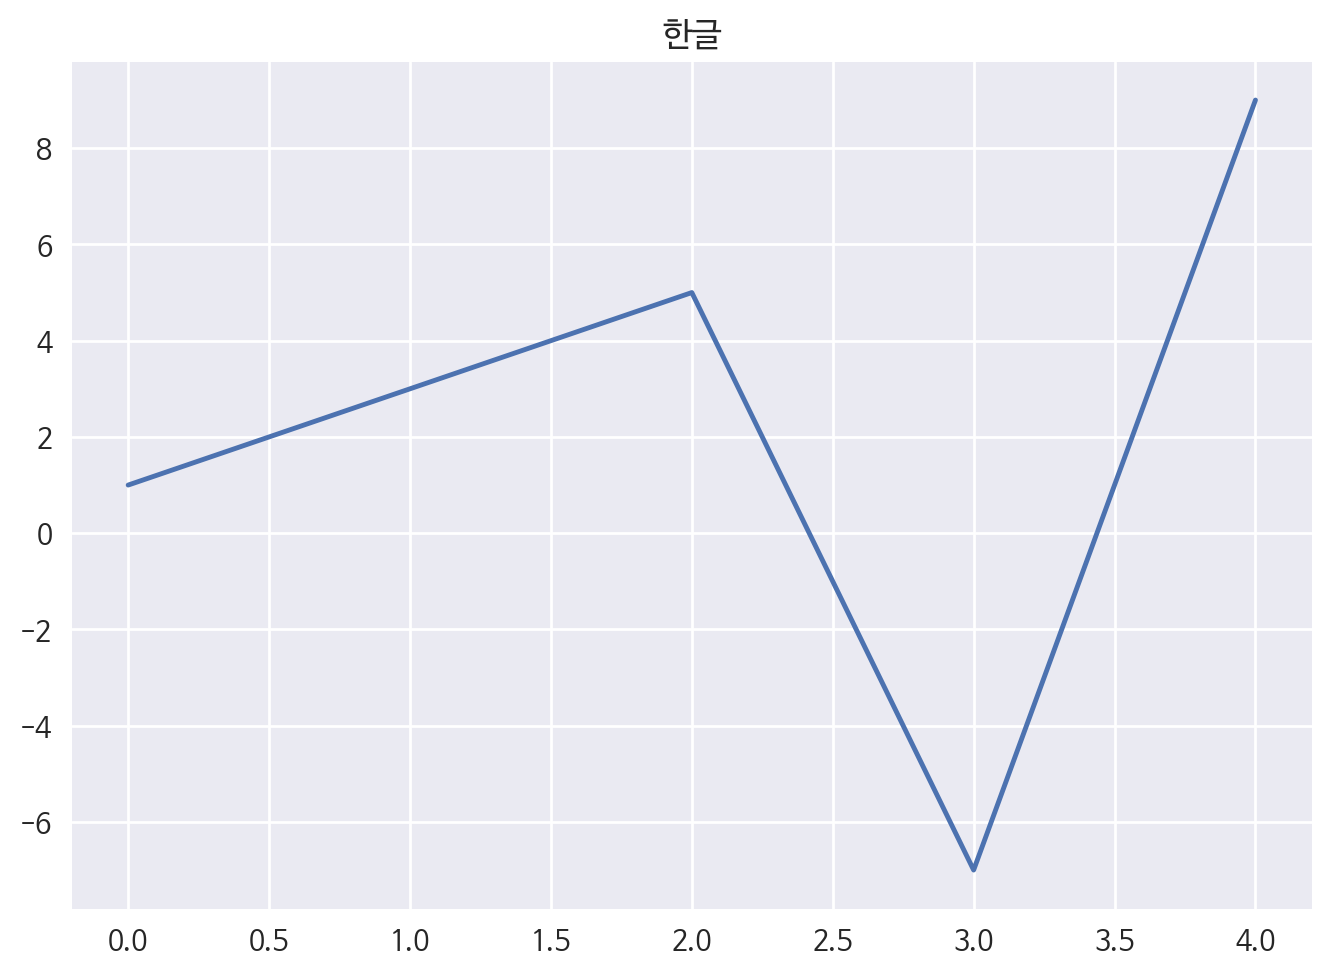

In [9]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [10]:
train = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/test_data.csv")
train.shape, test.shape

((45654, 3), (9131, 2))

In [11]:
topic = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [15]:
import re

def preprocessing(text):
  text = re.sub('\\\\n', ' ', text)
  text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]', ' ',text)
  text = re.sub('[\s]+', ' ', text)
  text = text.lower()
  return text

In [19]:
train['title'] = train['title'].map(preprocessing)
test['title'] = test['title'].map(preprocessing)

In [20]:
def remove_stopwords(text):
  tokens = text.split(' ')
  stops = ['합니다','하는','할','하고','한다','그리고','입니다','그','등','이런','및','제','더']
  meaningful_words = [w for w in tokens if not w in stops]
  return ' '.join(meaningful_words)

In [21]:
train['title'] = train['title'].map(remove_stopwords)
test['title'] = test['title'].map(remove_stopwords)

In [22]:
X_train_text = train['title']
X_test_text = test['title']
X_train_text.shape, X_test_text.shape

((45654,), (9131,))

In [23]:
label_name = "topic_idx"

In [24]:
train['topic_idx']

0        4
1        4
2        4
3        4
4        4
        ..
45649    1
45650    2
45651    1
45652    2
45653    2
Name: topic_idx, Length: 45654, dtype: int64

In [27]:
# 학습 세트의 정
y_train = train['topic_idx']
print(y_train.shape)
y_train.head()

(45654,)


0    4
1    4
2    4
3    4
4    4
Name: topic_idx, dtype: int64

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(max_features=70000)
cvect.fit(X_train_text)

CountVectorizer(max_features=70000)

In [ ]:
cvect.vocabulary_

In [55]:
X_train = cvect.transform(X_train_text)
X_test = cvect.transform(X_test_text)
X_train.shape, X_test.shape

((45654, 70000), (9131, 70000))

In [56]:
feature_names = cvect.get_feature_names_out()
feature_names

array(['aa', 'aa로', 'abba', ..., '힘합쳐', '힙합', '힙합공연장'], dtype=object)

In [57]:
vocab_sum = np.sum(X_train.toarray(), axis=0)
vocab_sum

array([2, 2, 1, ..., 1, 3, 1])

In [58]:
series_vocab_sum = pd.Series(vocab_sum)
series_vocab_sum.index = feature_names
df_vocab_sum = series_vocab_sum.to_frame().T
df_vocab_sum

,aa,aa로,abba,abba룰,abl글로벌자산운용,abs,abu,abu상,abu서,ab운용,...,힘은,힘을,힘의,힘이,힘입어,힘주는,힘찬,힘합쳐,힙합,힙합공연장
0,2,2,1,1,1,3,1,1,1,2,...,6,2,1,3,4,1,5,1,3,1


<Axes: >

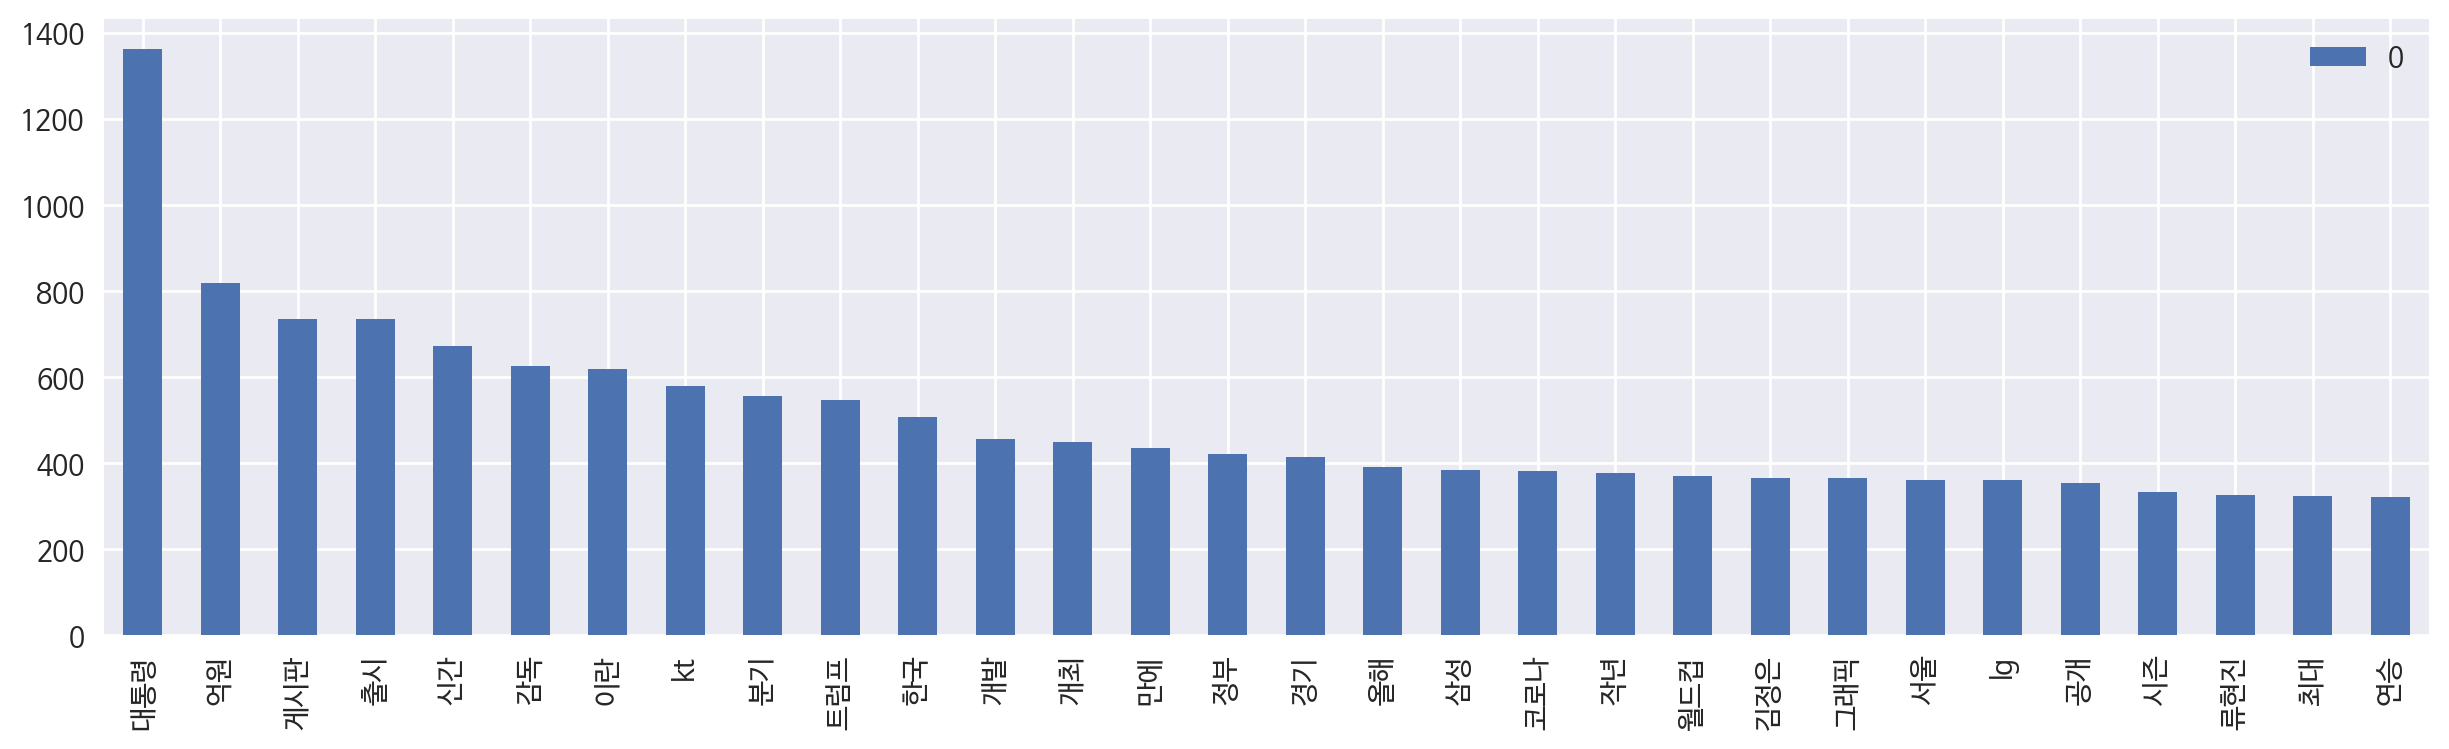

In [59]:
df_vocab_sum.T.sort_values(by=0, ascending=False).head(30).plot.bar(figsize=(15, 4))

In [95]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [96]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

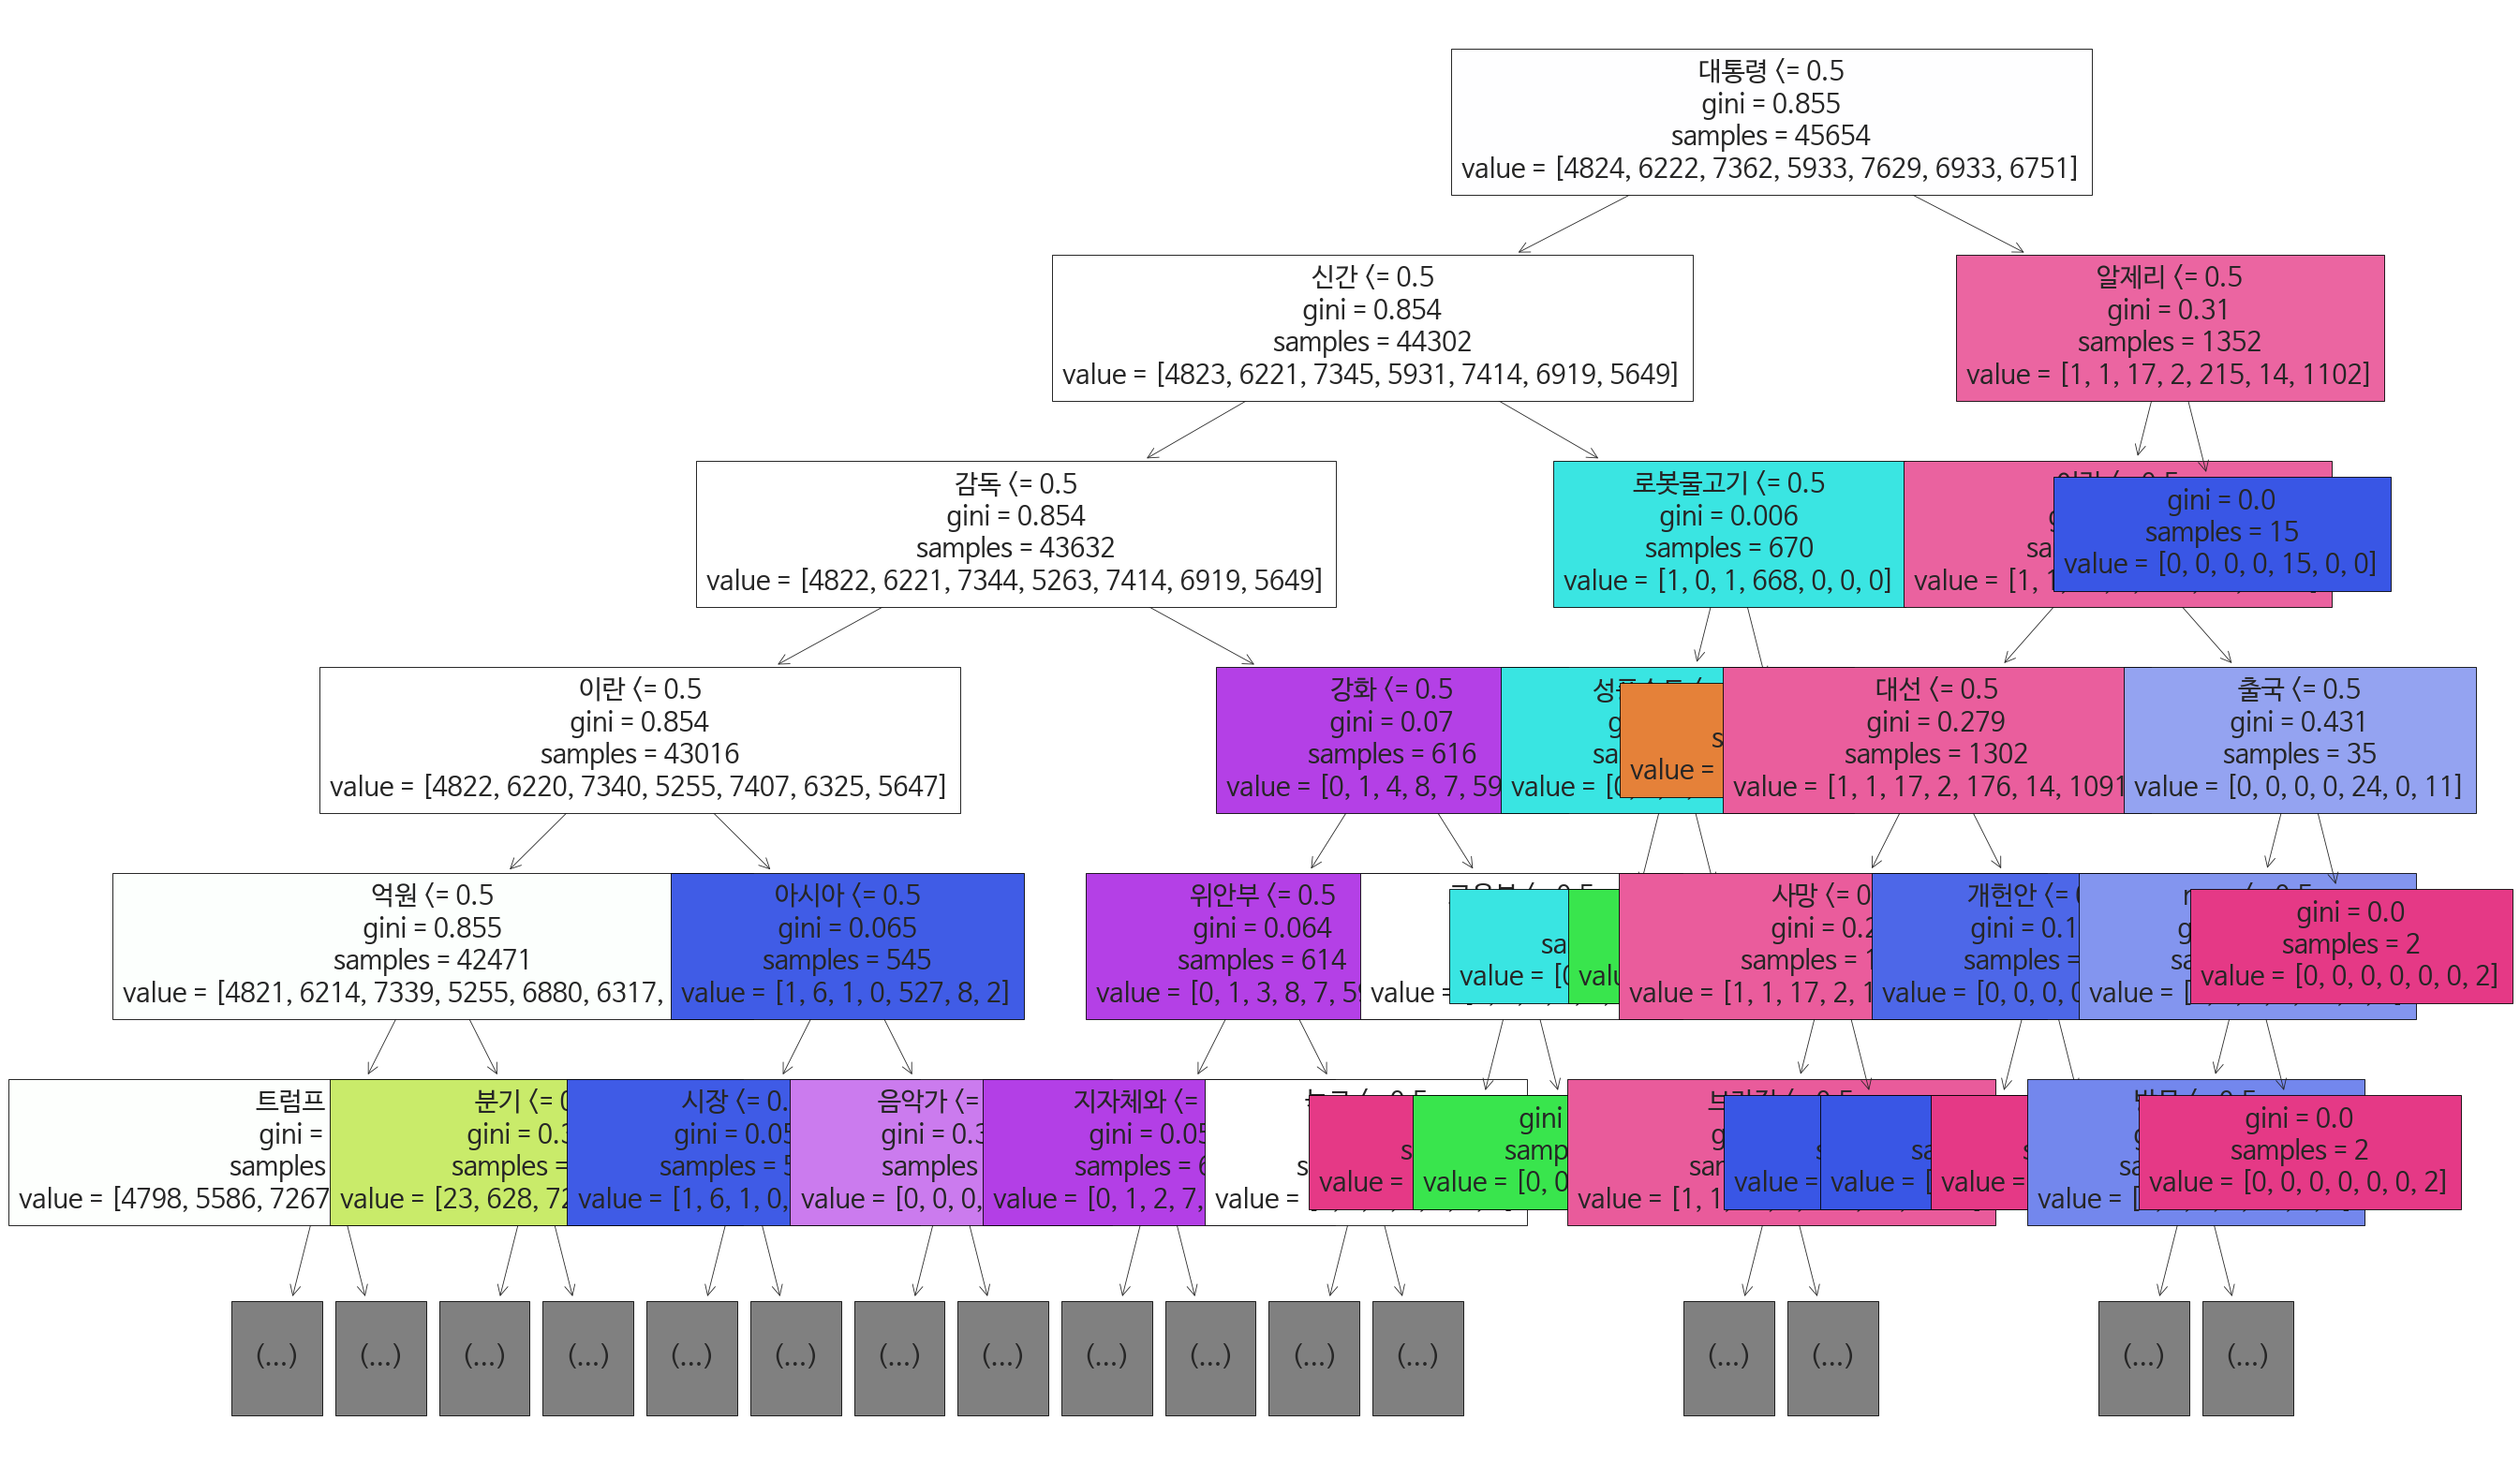

In [97]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, max_depth = 5,
          feature_names = feature_names,
          filled = True,
          fontsize = 10)
plt.show()

In [98]:
fim = pd.Series(model.feature_importances_)
fim.index = feature_names
fim_large = fim.nlargest(50)
fim_large

대통령      0.019052
신간       0.015210
감독       0.012179
이란       0.010964
억원       0.009797
트럼프      0.009341
출시       0.008064
개발       0.007112
코스피      0.007016
류현진      0.006661
연승       0.006644
월드컵      0.006513
김정은      0.006272
시즌       0.005467
코로나      0.005323
분기       0.005195
특징주      0.005132
터키       0.004935
아시안게임    0.004582
여행       0.004574
프로농구     0.004433
ai       0.004296
mlb      0.004191
사망       0.004045
경기       0.003971
여야       0.003626
한국당      0.003469
문대통령     0.003365
eu       0.003187
손흥민      0.003166
홍콩       0.003159
꺾고       0.002947
kt       0.002817
출간       0.002749
더민주      0.002664
총리       0.002646
사우디      0.002512
시리아      0.002477
날씨       0.002443
삼성       0.002412
연패       0.002388
nba      0.002273
여자배구     0.002273
프로배구     0.002260
국회       0.002196
이스라엘     0.002156
민주       0.002117
skt      0.002067
홈런       0.002056
북한       0.002028
dtype: float64

<Axes: >

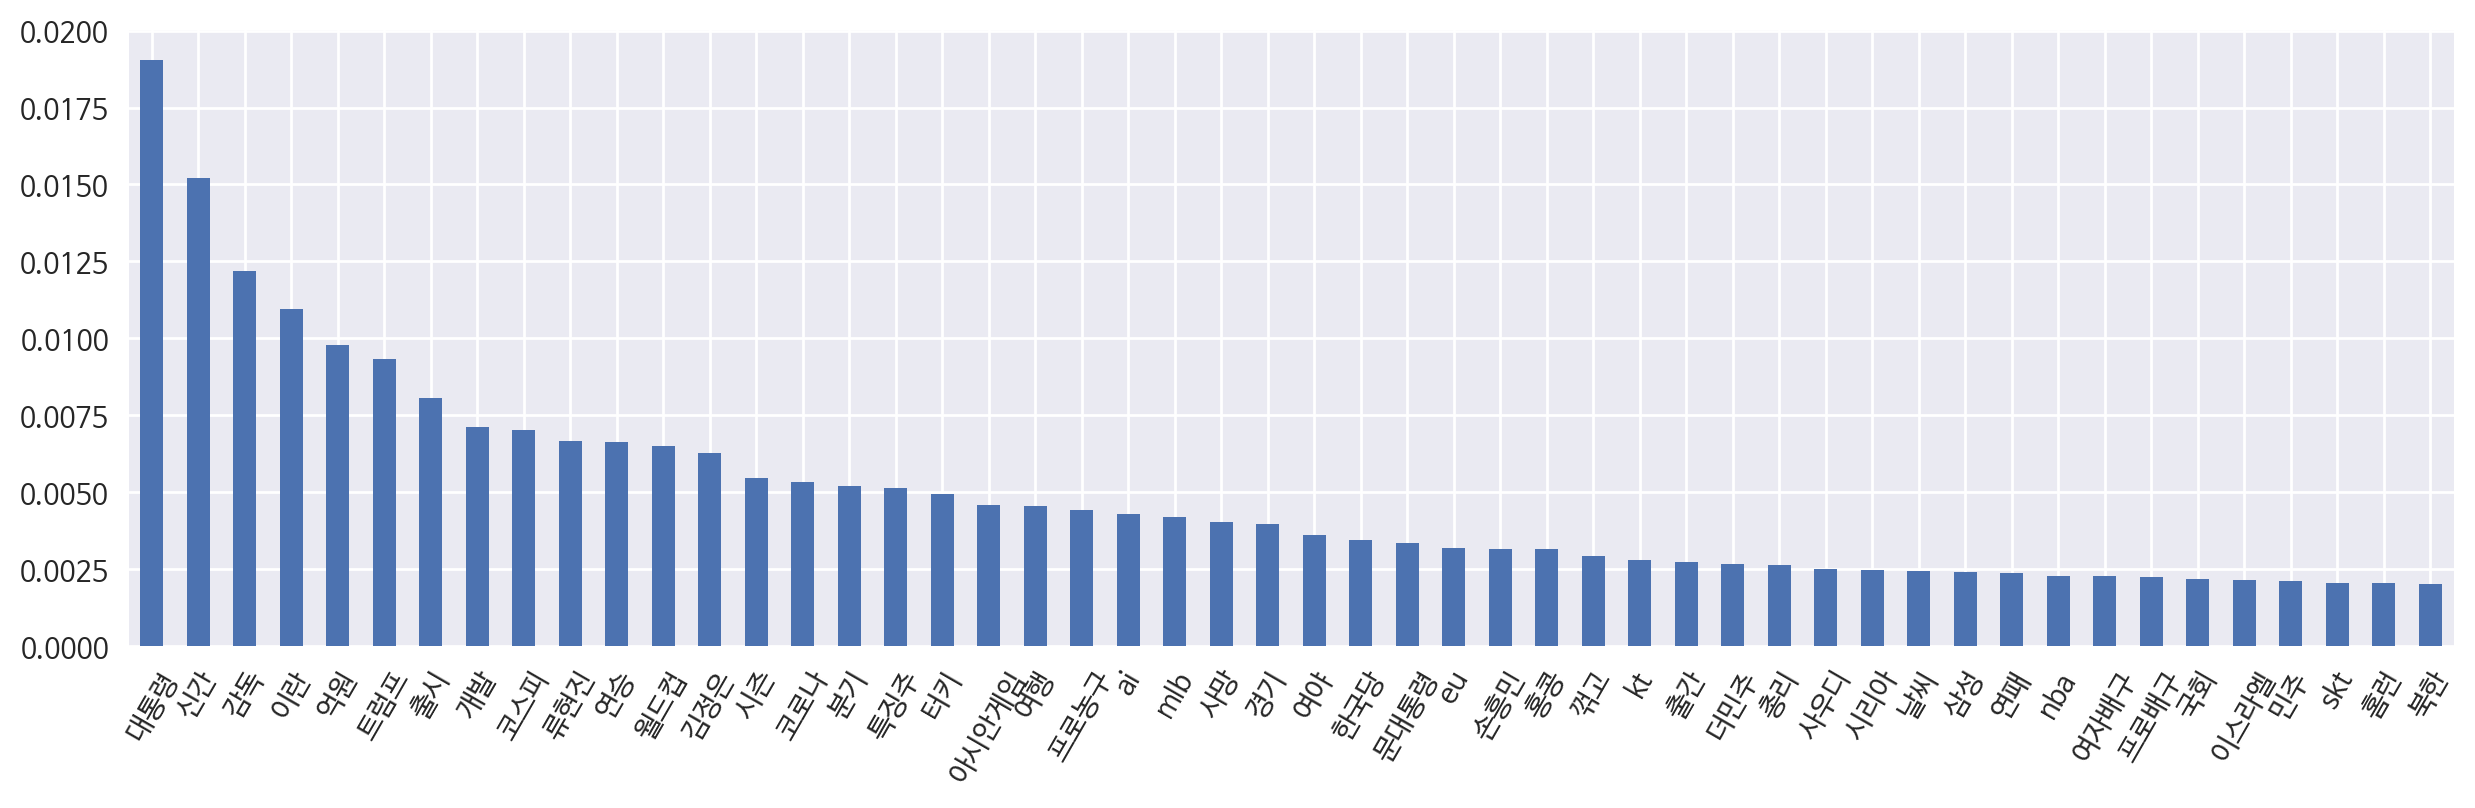

In [99]:
fim_large.plot.bar(rot= 60, figsize=(15,4))

In [100]:
y_predict = model.predict(X_test)
y_predict[:10]

array([2, 2, 0, 2, 3, 2, 5, 3, 4, 4])

In [101]:
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [102]:
pd.Series(y_predict).value_counts()

2    1701
4    1407
6    1339
5    1302
1    1166
0    1128
3    1088
dtype: int64

In [103]:
submit = pd.read_csv('/content/drive/MyDrive/오늘코드todaycode/data/klue/sample_submission.csv')
submit.head()

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0


In [104]:
submit["topic_idx"] = y_predict
submit.head()

,index,topic_idx
0,45654,2
1,45655,2
2,45656,0
3,45657,2
4,45658,3


In [105]:
file_name = '/content/drive/MyDrive/오늘코드todaycode/data/klue/submission_dt.csv'
file_name

'/content/drive/MyDrive/오늘코드todaycode/data/klue/submission_dt.csv'

In [106]:
submit.to_csv(file_name, index=False)

In [107]:
pd.read_csv(file_name)

,index,topic_idx
0,45654,2
1,45655,2
2,45656,0
3,45657,2
4,45658,3
...,...,...
9126,54780,3
9127,54781,2
9128,54782,4
9129,54783,2


전처리
불용어처리